# Yellowbrick Examples 

Ths notebook is a sample of the examples that yellowbrick provides.

In [1]:
%matplotlib inline

In [2]:
import os
import sys 

# Modify the path 
sys.path.append("..")

import pandas as pd
import matplotlib as mpl 
import yellowbrick as yb 
import matplotlib.pyplot as plt 

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


(<matplotlib.axes._subplots.AxesSubplot at 0x10e2fa890>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10e4f5250>)

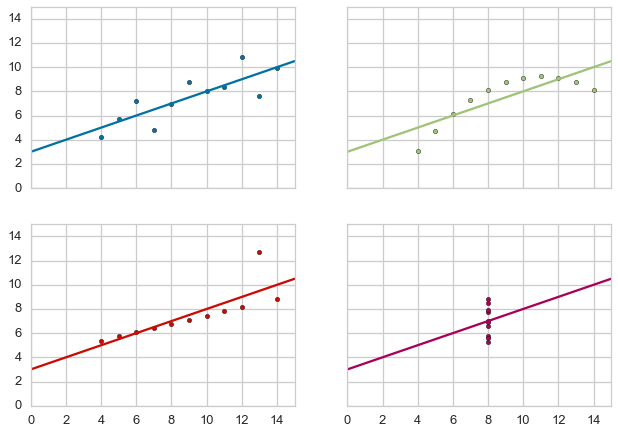

In [3]:
yb.anscombe()

## Load Datasets for Example Code

In [4]:
FIXTURES  = os.path.join(os.getcwd(), "data")
credit    = pd.read_excel(os.path.join(FIXTURES, "credit.xls"), header=1)
concrete  = pd.read_excel(os.path.join(FIXTURES, "concrete.xls"))
occupancy = pd.read_csv(os.path.join('data','occupancy','datatraining.txt'))

In [5]:
# Rename the columns of the datasets for ease of use. 
credit.columns = [
    'id', 'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
    'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
    'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
    'jul_pay', 'aug_pay', 'sep_pay', 'default'
]

concrete.columns = [
    'cement', 'slag', 'ash', 'water', 'splast',
    'coarse', 'fine', 'age', 'strength'
]

occupancy.columns = [
    'date', 'temp', 'humid', 'light', 'co2', 'hratio', 'occupied'
]


In [5]:
# Build models to use in visualization 

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.datasets.base import Bunch
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report as clsr
from sklearn.cross_validation import train_test_split as tts 

def build_model(data, features, target, model):
    """
    A helper function to quickly buiild a model from the data frames. 

    data: the data frame of the object to build. 
    features: the names of the attributes to extract as features.    
    target: the name of the column that is the target.
    model: an instance of the model to fit. 
    
    returns: the fitted model, as well as a Bunch: (X_train, X_test, y_train, y_test). 
    """
    X = data[features]
    y = data[target]
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)
    
    model = Pipeline([
        ('scale', StandardScaler()), 
        ('model', model)
    ])
    
    model.fit(X_train, y_train)
    
    return model, Bunch(
        X_train = X_train,
        X_test  = X_test,
        y_train = y_train,
        y_test  = y_test,
    )


oclm, oclm_data = build_model(occupancy, ['temp', 'humid', 'light', 'co2', 'hratio'], 'occupied', LinearSVC())

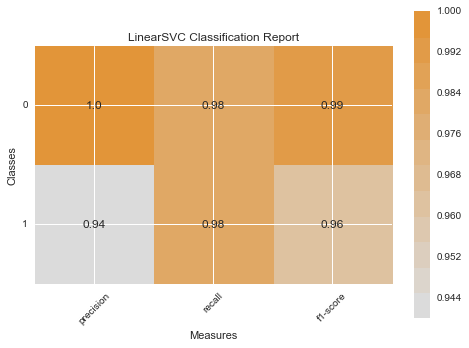

In [6]:
y_pred = oclm.predict(oclm_data.X_test)
yb.crplot(oclm, oclm_data.y_test, y_pred)

In [7]:
ocknn, ocknn_data = build_model(occupancy, ['temp', 'humid', 'light', 'co2', 'hratio'], 'occupied', KNeighborsClassifier())

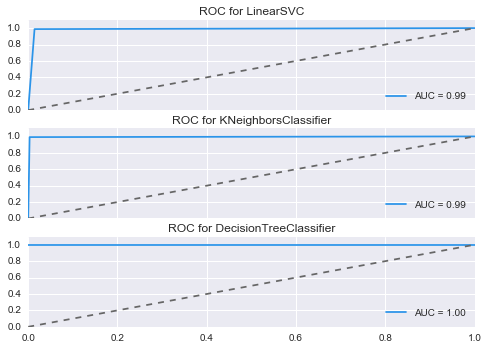

In [8]:
feats = ['temp', 'humid', 'light', 'co2', 'hratio']

models = [
    build_model(occupancy, feats, 'occupied', LinearSVC()),
    build_model(occupancy, feats, 'occupied', KNeighborsClassifier()),
    build_model(occupancy, feats, 'occupied', DecisionTreeClassifier())
]

yb.rocplot([model[0] for model in models], occupancy[feats], occupancy['occupied'])


In [ ]:
print(ocknn.steps[-1][1])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [ ]:
from sklearn.linear_model import Ridge, RANSACRegressor 
from sklearn.svm import SVR

feats  = [
    'cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age',
]

models = [
    build_model(concrete, feats, 'strength', Ridge()),
    build_model(concrete, feats, 'strength', SVR()),
    build_model(concrete, feats, 'strength', RANSACRegressor())
]

yb.peplot([model[0] for model in models], concrete[feats], concrete['strength'])


In [ ]:
from sklearn.linear_model import LinearRegression 

models = [Ridge(), LinearRegression(), SVR()]
yb.residuals_plot(models, concrete[feats], concrete['strength'])